<a href="https://colab.research.google.com/github/AlessandroConte/stroke-prediction/blob/main/Stroke_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction using Machine Learning: A Predictive Modeling Project

## Objective
This project aims to develop a machine learning model capable of predicting the likelihood of a stroke occurrence in individuals, based on a variety of health-related features. The dataset includes various attributes such as age, gender, smoking habits, hypertension, heart disease, and other factors that might contribute to stroke risk.

## Goal
The primary goal is to build accurate and reliable predictive models that can identify high-risk individuals, enabling early intervention strategies to reduce the incidence of strokes. The focus is on **reducing false negatives**, as failing to identify individuals at risk for a stroke can have serious health consequences.

## Approach

Throughout this project, several machine learning models were tested:

* **Initial Baseline Models**:
  * Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC) were trained on the original (imbalanced) dataset.
  
* **Performance Evaluation**:
  * Accuracy, precision, recall, F1-score, and confusion matrix were used.
  * Special focus was placed on **recall for the stroke class (stroke = 1)** to ensure minimal false negatives.

* **Handling Class Imbalance**:
  * Given the highly skewed class distribution, various sampling techniques were applied:
    * **SMOTE** (Synthetic Minority Over-sampling Technique)
    * **SMOTEENN** (SMOTE + Edited Nearest Neighbors)
    * **SMOTETomek** (SMOTE + Tomek links)
    * **Manual undersampling** to create a more balanced dataset while preserving data integrity.

* **Model Retraining & Tuning**:
  * After resampling, models were retrained and tuned using **GridSearchCV**.
  * Algorithms such as Random Forest and SVC showed varied performance depending on the balancing method and metric focus.

* **Advanced Models Evaluated**:
  * **MLPClassifier** (Multi-Layer Perceptron - Neural Network)
  * **XGBoostClassifier** (Extreme Gradient Boosting)
  * Although computationally more intensive, these models were tested to compare performance under various resampling strategies.

* **Ensemble & Cost-Sensitive Models**:
  * In a final step, specialized models designed to handle imbalance were applied:
    * **BalancedRandomForestClassifier**
    * **EasyEnsembleClassifier**
  * These models yielded the best performance in terms of **recall** for the minority class (stroke), even without external sampling techniques.

## Process Overview

1. **Data Cleaning & Preprocessing**
   * Handled missing values (especially in BMI)
   * Converted categorical features
   * Created age bins to explore correlation with BMI for better imputation

2. **Exploratory Data Analysis (EDA)**
   * Plotted distributions and feature relationships
   * Assessed class imbalance visually

3. **Model Training & Evaluation**
   * Baseline models vs tuned models
   * Evaluation based on confusion matrix, precision, recall, and F1-score

4. **Class Rebalancing Strategies**
   * Oversampling, undersampling, hybrid methods
   * Ensemble models with internal balancing mechanisms

5. **Final Comparison**
   * Focus on minimizing **false negatives**
   * SVC, Balanced Random Forest, and Easy Ensemble emerged as most effective under this criterion

## Key Learnings & Skills Demonstrated

* End-to-end **data preprocessing** and feature engineering
* Applying **various classification algorithms**
* Addressing **imbalanced classification problems**
* Conducting **model tuning** using GridSearchCV
* Comparing baseline vs advanced ensemble methods
* Interpreting results with emphasis on **real-world implications**
* Communicating limitations and justifying modeling choices

## Conclusion
This project highlights the application of machine learning in healthcare, demonstrating the ability to handle imbalanced datasets and implement various techniques to optimize predictive models. Through model evaluation and iterative tuning, the project provides insights into building reliable models for high-stakes prediction tasks, such as stroke risk detection. This work contributes to my portfolio by showcasing my expertise in machine learning, data analysis, and problem-solving, and serves as a valuable example of my ability to tackle real-world challenges using data-driven approaches.


## Library import

In [41]:
import pandas as pd

from google.colab import files

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from imblearn.over_sampling import SMOTE
from collections import Counter


## Data loading




In [42]:
# Load dataset from the relative path
# df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# df.head()


### Option: Upload dataset manually (for Colab users only)
If you're running this notebook in Google Colab, uncomment and use the code below to upload the dataset manually.


In [43]:
# Save the dataset (csv file) into the "uploaded" variable
uploaded = files.upload()

# Read the csv file into a DataFrame
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA (Exploratory Data Analysis)

---


In this section, we perform an initial exploration of the dataset to better understand the structure, distribution, and relationships within the data. The goal of the Exploratory Data Analysis (EDA) phase is to identify patterns, detect anomalies, check for missing values, and gain insights that can guide data preprocessing and feature engineering. We will examine both numerical and categorical features, visualize key variables, and assess their potential impact on stroke prediction.




### Dataset overview

In [44]:
# check the dataset's structure

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the output above we can see that the DataFrame has:

*   5110 rows (from index 0 to 5109)
*   12 columns (i.e., 12 variables)
*   By looking at the "Non-Null Count" we can clearly see where the missing values are (in this case the bmi column has 201 missing (NaN) values)

In [45]:
# statistical summary
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


By running `df.describe(include='all')`, we obtain a summary of both numerical and categorical columns.

* For numerical columns (e.g., age, bmi), the output includes statistics such as mean, standard deviation, min, max, and quartiles.
* For categorical columns (e.g., gender, work_type), it shows the number of unique categories, the most frequent value (`top`), and its frequency (`freq`).
* This helps us quickly understand the distribution, detect outliers, and identify missing values (e.g., the `bmi` column has 201 missing entries).


In [46]:
# sum all of the missing values

df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


There are 201 missing values in the bmi index column (i.e., bodymass index). In the next section we are going to handle them

In [47]:
# check the features type
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Note :
*  Categorical variables :  gender, ever_married, work_type, Residence_type, smoking_status
* Numerical variables : id, age, hypertension, heart_desease, avg_glucose_level, bmi
* Target : stroke

### Target Variable Distribution and Class Imbalance

We examine the distribution of the target variable (`stroke`) to assess if the dataset is balanced or imbalanced. This step is critical to understand potential challenges in model training.

In [48]:
df['stroke'].value_counts(normalize=True)


,proportion
stroke,
0,0.951272
1,0.048728


The target variable `stroke` is highly imbalanced, with approximately 95.1% of the instances belonging to the negative class (no stroke) and only about 4.9% representing positive stroke cases. This significant imbalance poses a challenge for model training, as standard algorithms may be biased towards the majority class. Therefore, special attention is required in model evaluation and potentially in the application of techniques to handle class imbalance.

### Data Visualization

#### Countplot

Text(0.5, 1.0, 'Target distribution (stroke)')

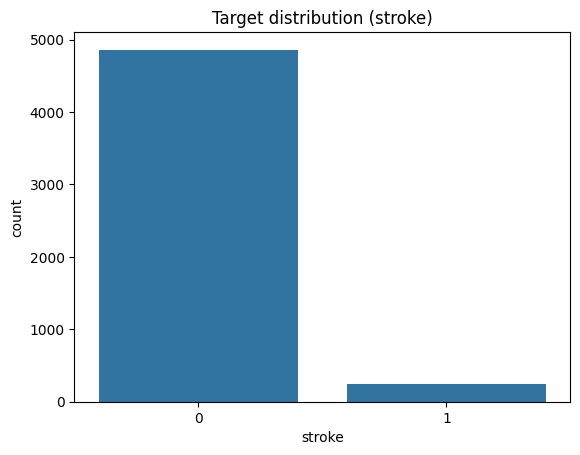

In [49]:
sns.countplot(x='stroke', data=df)
plt.title('Target distribution (stroke)')


The countplot above displays the distribution of the target variable `stroke`. It reveals a significant class imbalance, with the majority of instances belonging to the "no stroke" class (0), while only a small fraction experienced a stroke (1). This imbalance suggests the need for techniques such as resampling or class weighting during model training.


#### Boxplot


<Axes: xlabel='stroke', ylabel='age'>

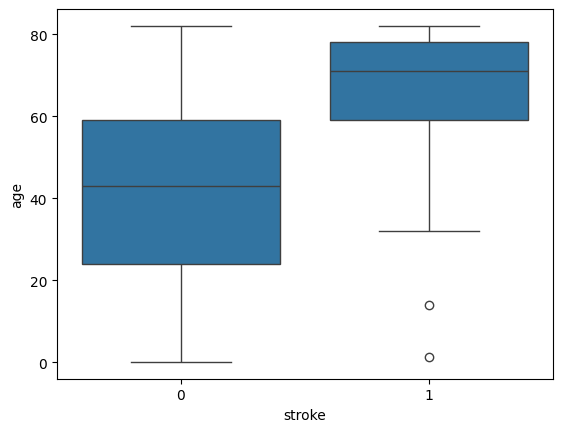

In [50]:
sns.boxplot(x='stroke', y='age', data=df)


The boxplot above shows the distribution of `age` for each class of the target variable. It is evident that individuals who suffered a stroke tend to be older on average compared to those who did not. This reinforces the known correlation between aging and increased stroke risk.

#### Histplot

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

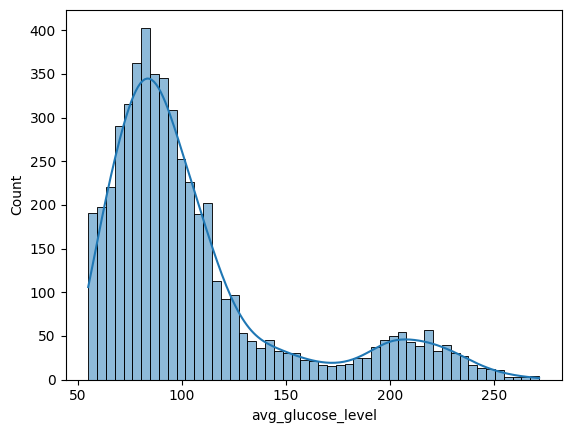

In [51]:
sns.histplot(df['avg_glucose_level'], kde=True)


This histogram shows that the majority of patients have an average glucose level around 80–90. The distribution appears to be right-skewed, with a primary peak in the lower glucose range and a secondary peak around 200, suggesting the presence of two distinct subgroups: one possibly representing patients with normal glucose levels, and the other representing those at risk due to elevated levels.

We can also observe that some patients have extremely high glucose levels, exceeding 250. These could either be outliers or may indicate severe cases of hyperglycemia, which is relevant because hyperglycemia is a well-known risk factor for strokes.

This distribution may justify further analysis to determine whether patients with higher glucose levels are more likely to have suffered a stroke. Understanding this relationship could support the identification of high-risk patients and contribute to the development of predictive models for stroke occurrence.

#### Heatmap

<Axes: >

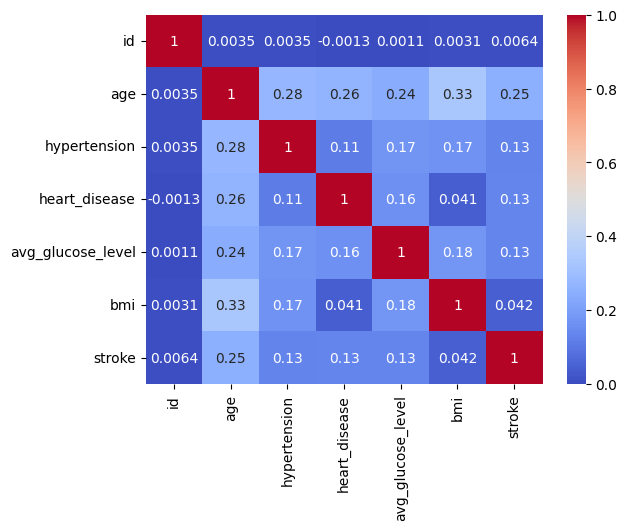

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


The correlation heatmap above illustrates the pairwise linear relationships among all numerical features and the target variable (`stroke`). As expected, there is no strong multicollinearity among features (all correlation coefficients are < 0.4), which suggests that we can retain all features without immediate concerns about redundancy.

Interestingly, `age` shows the highest correlation with `stroke` (0.25), followed by mild associations with `hypertension`, `heart_disease`, and `avg_glucose_level` (~0.13). The correlation between features and the target is relatively weak overall, which justifies exploring complex or non-linear machine learning models rather than relying solely on linear assumptions.

The `id` variable has no predictive value (correlation near zero) and should be dropped before modeling.


#### Barplots with Error Bars

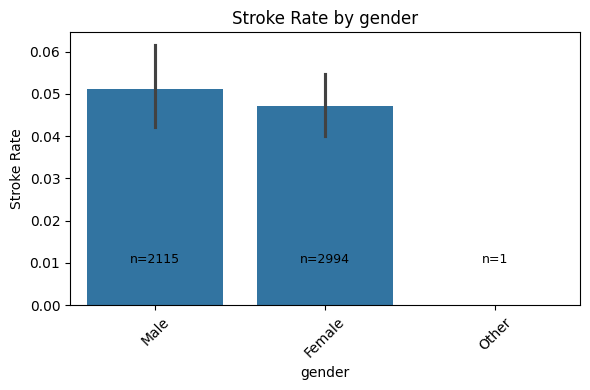

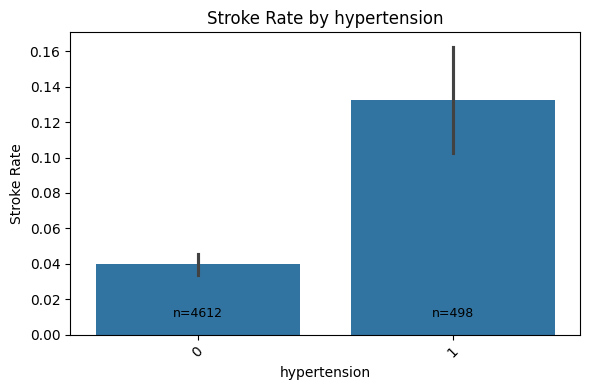

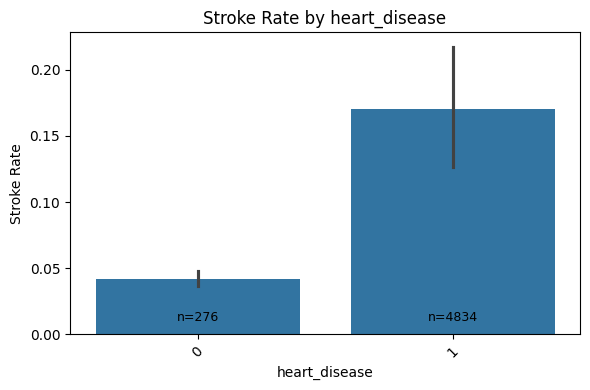

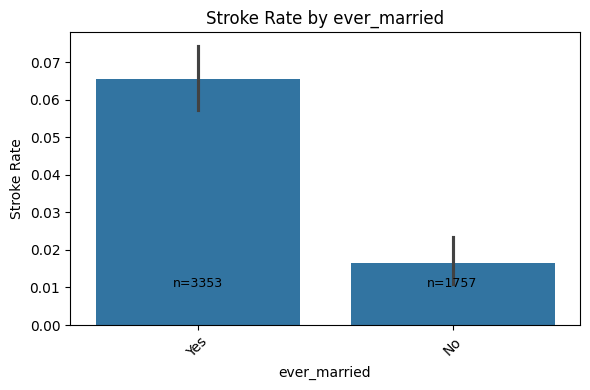

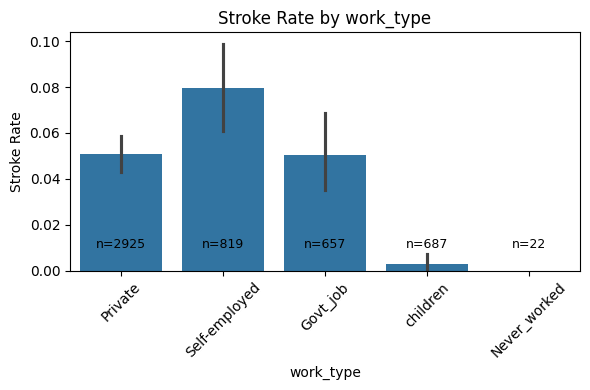

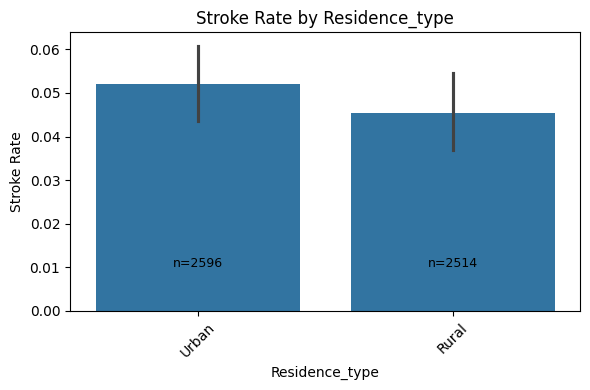

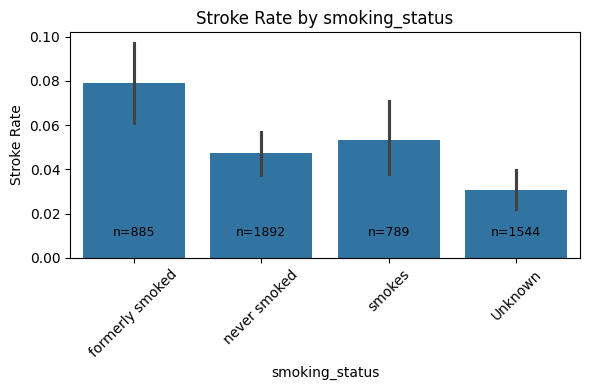

In [53]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x=var, y='stroke', estimator=lambda x: sum(x)/len(x))

    # observation number annotation
    counts = df[var].value_counts()
    for i, category in enumerate(df[var].unique()):
        plt.text(i, 0.01, f'n={counts[category]}', ha='center', fontsize=9)

    plt.title(f'Stroke Rate by {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Stroke Rate')
    plt.tight_layout()
    plt.show()


The vertical black lines on each bar represent **95% confidence intervals** (CI) for the stroke rate in each category. These intervals are calculated through bootstrapping and give a measure of the **uncertainty** around the estimated mean stroke rate.

- **Narrow intervals** indicate reliable estimates (larger sample size, low variance).
- **Wider intervals** reflect greater variability or fewer observations.
- Overlapping CIs suggest that differences between categories may **not be statistically significant**, underscoring the need for formal statistical testing or larger samples before inferring real effects.

**Stroke Rate by Categorical Variables**
- In the `ever_married` plot, individuals who have been married ("Yes") show a noticeably higher stroke rate compared to those who have never been married ("No"). The **non-overlapping confidence intervals** suggest that this difference might be **statistically significant** and should be further tested.

- For `work_type`, self-employed individuals appear to have the highest stroke rate, followed by those in private or government jobs. Children, as expected, have a near-zero stroke rate. The "Never_worked" group has a very small sample size (n=22), making the stroke rate estimate unreliable — a point supported by the **absence or instability of the confidence interval**.

These visualizations are essential in identifying potentially important risk factors or population segments worth further investigation and could inform feature selection or class-weighting strategies in model development.


#### Violinplot : age, BMI and glucose level distribution by Stroke

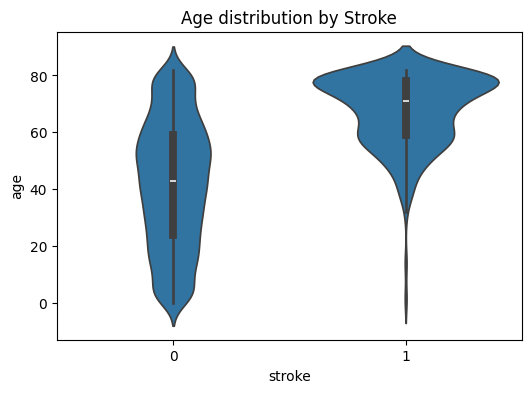

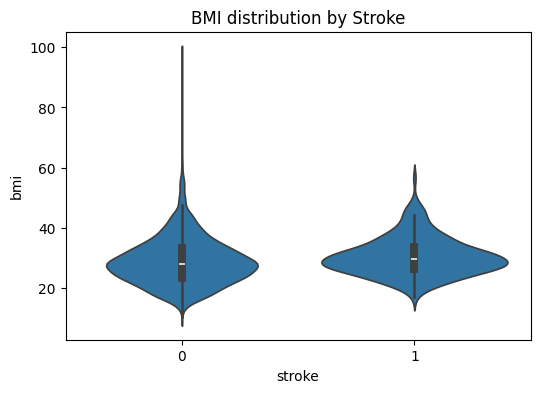

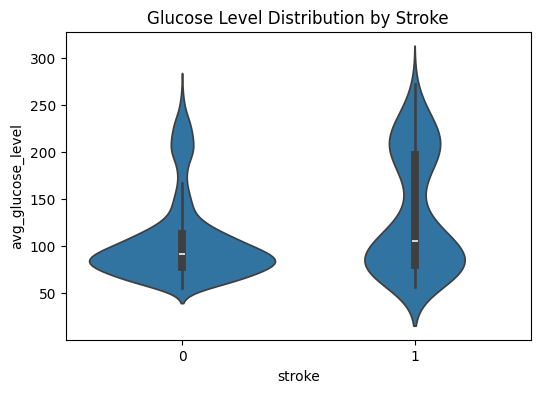

In [54]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='age')
plt.title('Age distribution by Stroke')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Glucose Level Distribution by Stroke')
plt.show()



The violin plots above visualize the distribution of two key continuous features (`age` and `bmi`) split by the target variable `stroke`.

- **Age distribution by Stroke**:  
  Patients who suffered a stroke (stroke = 1) are generally older, with a distribution skewed toward higher age values. The non-stroke group (stroke = 0) spans a wider age range, including many younger individuals. This suggests that age is a strong differentiating factor and a potential risk indicator for stroke.

- **BMI distribution by Stroke**:  
  The BMI distributions for stroke and non-stroke patients appear more similar, both centered around the 25–30 range. There is a slightly higher concentration of individuals with BMI > 30 among stroke patients, but the difference is less pronounced than with age. This implies that while BMI might contribute to stroke risk, it may not be a strong standalone predictor in this dataset.

- **Average glucose level distribution by Stroke**:
  Patients who have suffered a stroke tend to have, on average, higher glucose levels and greater variability than the other group. This may indicate a non-linear relationship between hyperglycemia and stroke risk.

These visualizations help to understand how continuous variables behave in relation to stroke occurrence and support further feature selection or transformation decisions.


## Preprocessing: Data Cleaning, Encoding, Scaling and Splitting

---

Before training any machine learning models, it is crucial to preprocess the data to ensure its quality and compatibility with various algorithms. In this section, we handle several key preprocessing steps:

- **Data cleaning**: to address missing values and correct inconsistencies.
- **Encoding**: to convert categorical variables into numerical format suitable for modeling.
- **Feature scaling**: to normalize numerical variables and ensure balanced contribution to the model.
- **Data splitting**: to divide the dataset into training and testing subsets, which enables reliable model evaluation.

These preprocessing steps are essential to build robust and generalizable predictive models.


### Data cleaning

The `bmi` feature contains missing values, which we handle by imputing the median. The median is a robust statistic that is not affected by extreme values or skewed distributions, making it a suitable choice for numerical data like BMI. This helps preserve the central tendency of the variable without introducing bias.



In [55]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


### Encoding

To prepare categorical variables for machine learning, we applied both label encoding and one-hot encoding based on the nature of each feature:

- `ever_married` and `Residence_type` are binary categorical variables, so we used label encoding to map their values directly to 0 and 1.
- For `work_type`, `smoking_status`, and `gender`, we used one-hot encoding via `pd.get_dummies()` to create dummy variables. We set `drop_first=True` to avoid multicollinearity caused by redundant dummy columns.

This encoding ensures that all categorical variables are transformed into a numeric format suitable for model training, without implying any ordinal relationship where it doesn’t exist.


In [56]:
# label encoding

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})


In [57]:
# one-hot encoding

df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'gender'], drop_first=True)
# drop_first = True to avoid multicollinearity

### Features Scaling

To ensure that numerical features contribute equally to the model and are not dominated by variables with larger scales, we standardized the `age`, `avg_glucose_level`, and `bmi` features using `StandardScaler`. Standardization rescales the features to have a mean of 0 and a standard deviation of 1, which is particularly important for algorithms sensitive to feature magnitudes, such as logistic regression or gradient-based models.

We applied feature scaling only to the continuous numerical features beacuse of the different value ranges and units, which could bias certain algorithms. Scaling them ensures uniform contribution to the model. We excluded the encoded categorical variables, as they are already binary (0/1) and do not require scaling.




In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


### Data splitting

#### Splitting Features and Target

We separate the dataset into features (`X`) and the target variable (`y`, which is `stroke`) to prepare for model training.


In [59]:
X = df.drop('stroke', axis=1)
y = df['stroke']


#### Train/Test Split

To evaluate the model’s ability to generalize to unseen data, we split the dataset into training and testing sets using an 80/20 ratio. The `train_test_split()` function is used with a fixed `random_state` for reproducibility.

We also set the `stratify=y` parameter to ensure that the proportion of classes in the target variable is preserved in both the training and test sets. This is particularly important because the target variable in the Stroke Prediction dataset is highly imbalanced — only a small percentage of samples belong to the positive class (stroke = 1).

Without `stratify=y`, we could end up with a test set that contains:
- Only negative cases (stroke = 0)
- Or an unrepresentative number of positive cases (stroke = 1)

By using `stratify=y`, we guarantee that the class distribution (0s and 1s) is maintained consistently across both subsets, improving the reliability of performance evaluation.


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Baseline Model: Logistic Regression

---

As a starting point, we use a simple Logistic Regression model to establish a baseline for stroke prediction. Logistic Regression is a well-known linear classifier that is easy to implement and interpret. While it is not expected to outperform more complex ensemble models, it provides a solid reference point to evaluate improvements offered by subsequent models.

We will evaluate the baseline model using common classification metrics such as accuracy, precision, recall, and the confusion matrix. Despite its simplicity, Logistic Regression often performs reasonably well, especially when the features are properly scaled and the data is preprocessed effectively.


### Logistic Regression: Convergence Adjustment

Initially, the Logistic Regression model raised a `ConvergenceWarning`, indicating that the solver failed to converge within the default number of iterations. This issue persisted even with `max_iter=2000`, and only disappeared after increasing the parameter to `max_iter=10000`.

This behavior is expected with imbalanced datasets or when the optimization surface is complex. The `max_iter` parameter defines how many iterations the solver is allowed before stopping. If the loss function does not converge within that limit, scikit-learn raises a warning to alert the user. Adjusting this parameter ensures that the model reaches stable coefficients for reliable predictions.


In [61]:
# Train the baseline model
baseline_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7495107632093934

Confusion Matrix:
 [[726 246]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



The logistic regression model achieved an overall accuracy of ~75%.

While the precision for the positive class (stroke) is low (0.14), the recall is high (0.80), meaning the model is able to correctly identify most stroke cases.

This trade-off indicates a bias toward capturing positives, which may be acceptable in health-related contexts where missing a positive case is riskier than a false alarm.


## Training and Comparing Classical ML Models

---

To evaluate different modeling approaches on the stroke prediction task, we train and compare three widely-used classification algorithms:  
- **Random Forest**: a robust ensemble method that handles nonlinear relationships and feature interactions well.  
- **K-Nearest Neighbors (KNN)**: a simple yet effective instance-based method that classifies based on proximity in the feature space.  
- **Support Vector Machine (SVM)**: a powerful algorithm that maximizes the margin between classes and performs well in high-dimensional spaces.

These models represent a diverse set of strategies—tree-based, distance-based, and margin-based—allowing us to assess how different learning paradigms handle the characteristics of this dataset.

Each model is evaluated using the following metrics:
- **Accuracy**: the overall correctness of the model.
- **Precision**: the proportion of correctly predicted positive cases among all predicted positives.
- **Recall**: the proportion of correctly predicted positive cases among all actual positives.
- **F1-score**: the harmonic mean of precision and recall, especially important in imbalanced datasets.
- **Confusion matrix**: a detailed view of true positives, true negatives, false positives, and false negatives.

Given the class imbalance in the dataset, relying on accuracy alone would be misleading. For this reason, precision, recall, and F1-score are essential to evaluate the model’s performance on the minority class (stroke = 1).

To avoid redundant code and ensure consistency across evaluations, we define a reusable function named `evaluate_model`.

> **Note:**  
In this project, Support Vector Machines (SVM) are implemented using the `SVC` (Support Vector Classifier) class from scikit-learn, which is specifically designed for classification tasks.



In [62]:
# create the function to avoid reduntant code
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("--------------------------------------------------\n")


In [63]:
# call the function
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9500978473581213

Confusion Matrix:
 [[971   1]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.9510763209393346

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

------------------------------------------

### Model Evaluation and Class Imbalance Impact

#### Random Forest & KNN
- Both models reach **95% accuracy**, but this is misleading.
- The **recall for the minority class (stroke = 1)** is **0.00** so the model does **not detect any strokes**.
- This means the model is **just predicting "no stroke" for everyone**, which is dangerous in real-world scenarios.

#### SVC
- This model captures some stroke cases (recall = 0.18), but still performs poorly.
- Accuracy drops to ~72%, but at least the model attempts to distinguish classes.
- Precision and F1-score for the positive class remain low.

#### Confusion Matrices Summary:
| Model      | TP | FN | FP | TN |
|------------|----|----|----|----|
| RF / KNN   | 0  | 50 | 1  | 971 |
| SVM        | 9  | 41 | 243| 729 |

**Conclusion:** Accuracy is not a reliable metric in imbalanced datasets. In the next step, we will apply techniques such as:
- Resampling (e.g., SMOTE)
- Using `class_weight` and more robust metrics like F1-score


## Class Balancing & Model Re-training

---

In this section, we address the issue of class imbalance by applying **SMOTE** (Synthetic Minority Over-sampling Technique) to the training data and then **retraining our models** (Random Forest, KNN, SVM). SMOTE generates synthetic samples for the minority class by interpolating between existing minority instances and their nearest neighbors, effectively creating a more balanced dataset.

This approach is crucial when dealing with imbalanced target variables—like stroke detection—where the positive class (stroke = 1) is significantly underrepresented. Without balancing, models may be biased toward the majority class, leading to misleadingly high accuracy but poor sensitivity to rare events.

By re-training the classifiers on SMOTE-enhanced data, we aim to:
* Improve recall and F1-score on the minority class.
* Achieve a better trade-off between sensitivity and specificity.
* Compare performance improvements against baseline metrics obtained pre-SMOTE.

### SMOTE

The original dataset was **highly imbalanced**, with only 5% of positive stroke cases. In such situations, machine learning models tend to ignore the minority class, resulting in poor recall and F1-score for the stroke cases.

To overcome this, we applied **SMOTE**, a technique that generates synthetic samples of the minority class, helping the model learn to recognize stroke patterns more effectively. The resampling was applied only to the training set, while evaluation was performed on the original test set, to ensure realistic validation.

In [64]:
!pip install imbalanced-learn


In [65]:
# SMOTE training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 3889, 1: 199})
Resampled class distribution: Counter({0: 3889, 1: 3889})


### Model re-training

Models are retrained using the balanced dataset.
The evaluation includes accuracy, confusion matrix, and classification report, with a focus on recall and precision for the positive class (stroke = 1).

In [66]:
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9148727984344422

Confusion Matrix:
 [[929  43]
 [ 44   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.6066536203522505

Confusion Matrix:
 [[598 374]
 [ 28  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       972
           1       0.06      0.44      0.10        50

    accuracy                           0.61      1022
   macro avg       0.51      0.53      0.42      1022
weighted avg       0.91      0.61      0.72      1022

------------------------------------------

#### Observations after SMOTE

- **Random Forest** performs well in overall accuracy (~91%) but still struggles to identify stroke cases (Recall = 0.14).
- **KNN** shows slightly better recall (0.46) for the stroke class but suffers a major drop in overall accuracy.
- **SVC** shows moderate improvements in recall but still has a very low precision for the minority class.

Despite the use of SMOTE, all models face challenges in detecting positive cases. This is expected in **highly imbalanced datasets** where features may not be fully predictive.
